In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%pylab inline
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn import metrics

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv('Flipkart Mobile - 2.csv')

In [3]:
df.shape

(430, 16)

In [4]:
df.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [5]:
#df=df.drop(columns=['model','base_color','num_of_ratings','discount_percent','sales'])

In [6]:
df.describe()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000
mean,105.748837,5.320930,6.369767,2.904651,1.044186,4529.397674,4.339302,23567.944186,25433.234884,0.108000,29.752326
std,63.164064,2.182635,0.369549,0.952350,0.227280,986.907252,0.151494,56096.277784,22471.926588,0.073432,58.399588
min,8.000000,1.000000,4.700000,1.000000,1.000000,1800.000000,3.000000,4.000000,5742.000000,0.010000,0.000000
25%,64.000000,4.000000,6.300000,2.000000,1.000000,4000.000000,4.300000,745.000000,11999.000000,0.060000,1.640000
50%,128.000000,4.000000,6.500000,3.000000,1.000000,4500.000000,4.300000,5197.500000,16989.500000,0.090000,9.655000
75%,128.000000,6.000000,6.500000,4.000000,1.000000,5000.000000,4.400000,21089.250000,28999.000000,0.160000,29.717500
max,512.000000,12.000000,7.600000,4.000000,3.000000,7000.000000,4.600000,642373.000000,157999.000000,0.440000,550.190000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

In [8]:
percent_missing=(df.isnull().sum()*100/len(df)).round(2)
percent_missing

brand               0.0
model               0.0
base_color          0.0
processor           0.0
screen_size         0.0
ROM                 0.0
RAM                 0.0
display_size        0.0
num_rear_camera     0.0
num_front_camera    0.0
battery_capacity    0.0
ratings             0.0
num_of_ratings      0.0
sales_price         0.0
discount_percent    0.0
sales               0.0
dtype: float64

<AxesSubplot:>

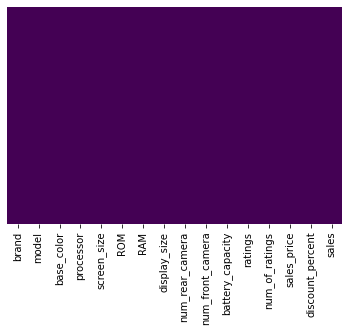

In [88]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='ROM'>

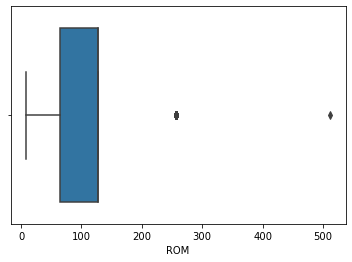

In [89]:
sns.boxplot(x=df['ROM'])

<AxesSubplot:xlabel='RAM'>

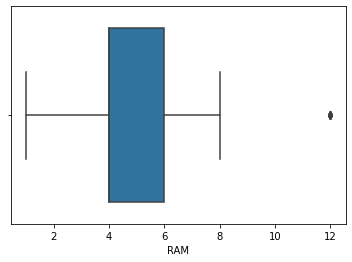

In [90]:
sns.boxplot(x=df['RAM'])

<AxesSubplot:xlabel='sales_price'>

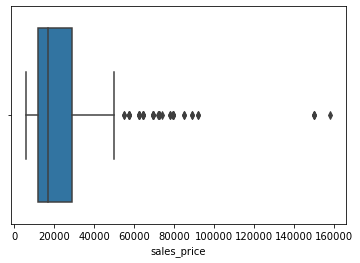

In [91]:
sns.boxplot(x=df['sales_price'])

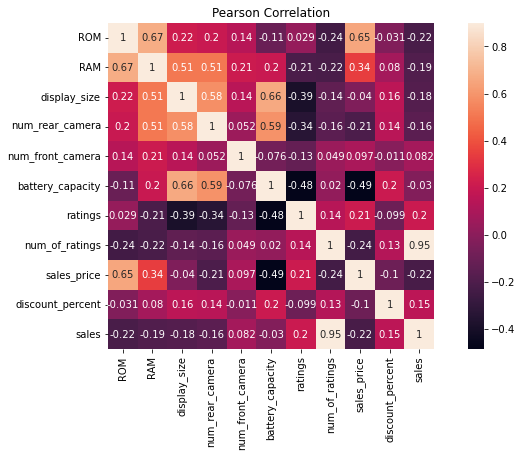

In [92]:
#heatmap correlation
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), vmax = 0.9, square = True, annot=True)
plt.title("Pearson Correlation")
plt.show()

In [107]:
df.drop(['num_of_ratings','battery_capacity','sales_price'], axis = 1)

,ROM,RAM,display_size,num_rear_camera,num_front_camera,ratings,discount_percent,sales,brand_Poco,brand_Realme,...,processor_Exynos,processor_MediaTek,processor_Others,processor_Qualcomm,processor_Water,processor_iOS,screen_size_Medium,screen_size_Small,screen_size_Very Large,screen_size_Very Small
0,64,2,4.7,1,1,4.5,0.17,127.52,0,0,...,0,0,0,0,1,0,0,0,0,1
1,64,4,5.4,2,1,4.5,0.04,1.39,0,0,...,0,0,0,0,0,0,0,1,0,0
2,64,2,4.7,1,1,4.5,0.17,127.52,0,0,...,0,0,0,0,1,0,0,0,0,1
3,64,3,6.1,1,1,4.6,0.10,23.07,0,0,...,0,0,0,0,0,1,1,0,0,0
4,128,4,6.1,2,1,4.6,0.02,5.15,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,32,3,5.8,2,1,4.3,0.30,1.50,0,0,...,0,0,0,1,0,0,0,1,0,0
426,64,4,5.8,2,1,4.3,0.28,1.73,0,0,...,0,0,0,1,0,0,0,1,0,0
427,128,6,6.5,3,1,4.2,0.12,3.42,0,0,...,0,0,0,1,0,0,0,0,0,0
428,32,3,6.2,2,1,4.2,0.07,6.77,0,0,...,0,0,0,1,0,0,1,0,0,0


In [108]:
X = df.drop(['sales_price','num_of_ratings','battery_capacity'], axis = 1)
y = df['sales_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(301, 151)
(301,)
(129, 151)
(129,)


In [109]:

#handling categorical data
df = pd.get_dummies(df, drop_first = True)
df.head()

,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,...,processor_Exynos,processor_MediaTek,processor_Others,processor_Qualcomm,processor_Water,processor_iOS,screen_size_Medium,screen_size_Small,screen_size_Very Large,screen_size_Very Small
0,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,...,0,0,0,0,1,0,0,0,0,1
1,64,4,5.4,2,1,2815,4.5,244,57149,0.04,...,0,0,0,0,0,0,0,1,0,0
2,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,...,0,0,0,0,1,0,0,0,0,1
3,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,...,0,0,0,0,0,1,1,0,0,0
4,128,4,6.1,2,1,2815,4.6,745,69149,0.02,...,0,0,0,0,0,0,1,0,0,0


In [110]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

-3194739495579811.5

In [111]:
ridge = RidgeCV()
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.9533867578358878

In [112]:
lasso = LassoCV()
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.6405395968179741

In [113]:
#OLS Regression
import statsmodels.api as sm
X = sm.add_constant(X_train)
y = y_train
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            sales_price   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     373.9
Date:                Wed, 16 Nov 2022   Prob (F-statistic):          1.06e-166
Time:                        06:41:33   Log-Likelihood:                -2602.2
No. Observations:                 301   AIC:                             5466.
Df Residuals:                     170   BIC:                             5952.
Df Model:                         130                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

The best model is ridge regression

In [114]:
y_pred = ridge.predict(X_test)
print(y_pred)

[12821.9302244  14977.41769387 44077.38627499  8087.27494814
 59519.22660993 21836.49701434 32754.13723522 12880.6934012
 12740.7901508  12025.96505437 47235.25497411 13452.01768318
 31293.78978051 13272.79244247 46494.96265381 10966.4845575
 15445.4928359  24526.38434417 13507.63743005 25695.54418189
 16639.18122882  7854.94243666 13801.61148566 59659.12986033
 69350.40297543 19880.89818772 18567.72802895 20166.89949896
  8889.86028243 62391.58268028 29451.74835372 29655.17896615
 23626.82162261 35386.94741573 33900.26907561 20161.58518866
 16016.96180315 10963.8810881  30599.10305632 12549.95957345
 18180.04521339 11278.87072769 31621.38116511 17355.16580984
 46926.93200348 25264.98401186 11652.63696182 10342.98851692
 15345.35907412 16009.05931168 94966.09190999 12389.6825229
 69191.30625624 11232.66263909 23969.21583989  9143.61608824
 10030.92223632 12690.20943011 20852.08722697 12318.35680797
 18270.58819549  6131.60250226 14282.73096968  8577.79400183
 29336.89368828 10190.57202

In [72]:
metrics.mean_absolute_error(y_test, y_pred).round(2)

2057.77

In [73]:
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape

In [74]:
mape(y_test, y_pred)

0.1145262903720785

In [75]:
metrics.r2_score(y_test, y_pred)

0.9576007327615309

In [76]:
len(y_pred)

129

In [79]:
len(X_test)

129